In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
original_data = pd.read_excel('D:/feps  fourth year curriculum/CDA/mini project/Thailand resources/F00013220-WVS_Wave_7_Thailand_Excel_v5.0.xlsx')

D:\programs\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# Selecting important cols out of all cols


imp_columns = original_data[['Q46: Feeling of happiness' ,'Q48: How much freedom of choice and control',
                            'Q50: Satisfaction with financial situation of household' ,
                            'Q54: Frequency you/family (last 12 month): Gone without a cash income',
                            'Q158: Science and technology are making our lives healthier, easier, and more comfortable',
                            'Q260: Sex']]

imp_columns
                            
                            

,Q46: Feeling of happiness,Q48: How much freedom of choice and control,Q50: Satisfaction with financial situation of household,Q54: Frequency you/family (last 12 month): Gone without a cash income,"Q158: Science and technology are making our lives healthier, easier, and more comfortable",Q260: Sex
0,2,10,9,4,2,2
1,1,7,8,4,5,1
2,2,5,3,2,10,1
3,1,8,8,2,9,2
4,2,10,1,1,1,2
...,...,...,...,...,...,...
1495,1,1,1,2,10,2
1496,1,5,5,1,9,1
1497,1,8,8,4,9,2
1498,2,7,8,4,10,1


# Preparing The Response Variable

In [4]:
imp_columns['Q46: Feeling of happiness'].value_counts()

# -5 correspond to a missing value

Q46: Feeling of happiness
 2    767
 1    486
 3    227
 4     14
-5      6
Name: count, dtype: int64

In [5]:
# Remove rows where the value in 'Q46: Feeling of happiness' is -5
imp_columns = imp_columns[imp_columns['Q46: Feeling of happiness'] != -5]
imp_columns['Q46: Feeling of happiness'].value_counts()

Q46: Feeling of happiness
2    767
1    486
3    227
4     14
Name: count, dtype: int64

In [6]:
# Mapping 3 & 4 to be 3(Not happy)
# 1- he's happy
# 2- he's quite happy
# 3- he's unhappy
imp_columns['Q46: Feeling of happiness'] = imp_columns['Q46: Feeling of happiness'].map({1:1 , 2:2 ,3:3 , 4:3})

C:\Users\mohamed1852\AppData\Local\Temp\ipykernel_11664\1093381171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_columns['Q46: Feeling of happiness'] = imp_columns['Q46: Feeling of happiness'].map({1:1 , 2:2 ,3:3 , 4:3})


In [7]:
imp_columns['Q46: Feeling of happiness'].value_counts()

Q46: Feeling of happiness
2    767
1    486
3    241
Name: count, dtype: int64

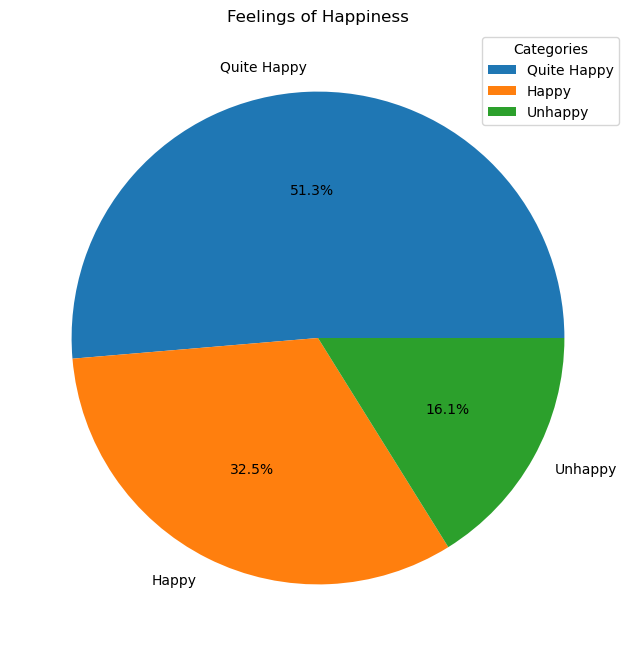

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q46: Feeling of happiness'].value_counts(), labels = ['Quite Happy' , 'Happy' , 'Unhappy'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Feelings of Happiness')
plt.show()

# Preparing the Explanatory Variables

### Preparing the variable no. 1
 

In [9]:
imp_columns['Q48: How much freedom of choice and control'].value_counts()

Q48: How much freedom of choice and control
 5     319
 8     235
 6     234
 7     216
 10    128
 4     112
 3      70
 9      70
 1      63
 2      39
-1       8
Name: count, dtype: int64

In [10]:
# Removing missing values

imp_columns = imp_columns[imp_columns['Q48: How much freedom of choice and control'] != -1]
imp_columns['Q48: How much freedom of choice and control'].value_counts()

Q48: How much freedom of choice and control
5     319
8     235
6     234
7     216
10    128
4     112
3      70
9      70
1      63
2      39
Name: count, dtype: int64

In [11]:
#Mapping
# 1- Good Control(Combining from 6 to 10)
# 2- Poor Control (combining from 1 to 5)
imp_columns['Q48: How much freedom of choice and control'] = imp_columns['Q48: How much freedom of choice and control'].map({
    1:2 , 2:2 ,3:2 , 4:2 ,5:2,6:1 , 7:1 , 8:1 , 9:1 , 10:1})

imp_columns['Q48: How much freedom of choice and control'].value_counts()

Q48: How much freedom of choice and control
1    883
2    603
Name: count, dtype: int64

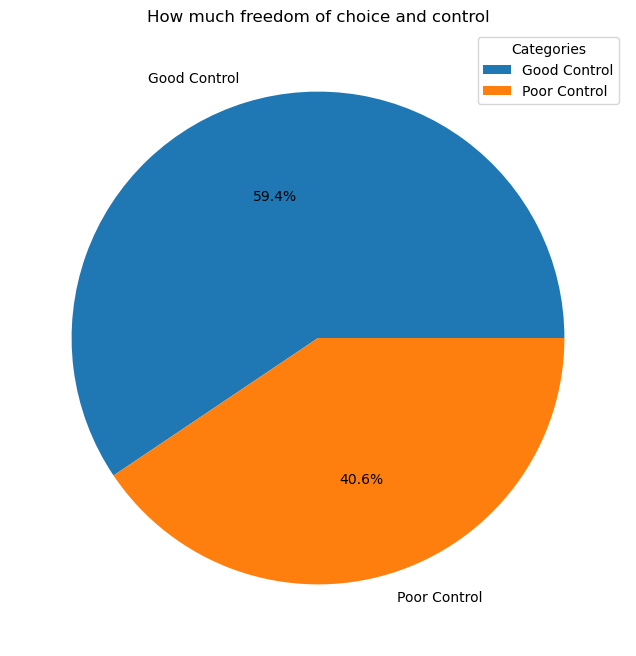

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q48: How much freedom of choice and control'].value_counts(), labels = ['Good Control' , 'Poor Control'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('How much freedom of choice and control')
plt.show()

###  Preparing the variable no. 2


In [13]:
imp_columns['Q50: Satisfaction with financial situation of household'].value_counts()

Q50: Satisfaction with financial situation of household
 5     320
 7     249
 8     234
 6     226
 4     109
 9      90
 10     89
 3      88
 2      40
 1      37
-1       4
Name: count, dtype: int64

In [14]:
# removing missing values
imp_columns = imp_columns[imp_columns['Q50: Satisfaction with financial situation of household'] != -1]
imp_columns['Q50: Satisfaction with financial situation of household'].value_counts()

Q50: Satisfaction with financial situation of household
5     320
7     249
8     234
6     226
4     109
9      90
10     89
3      88
2      40
1      37
Name: count, dtype: int64

In [15]:
#Mapping
# 1- satisfied(Combining from 6 to 10)
# 2- Dissatisfied (combining from 1 to 5)
imp_columns['Q50: Satisfaction with financial situation of household'] = imp_columns['Q50: Satisfaction with financial situation of household'].map({
    1:2 , 2:2 ,3:2 , 4:2 ,5:2,6:1 , 7:1 , 8:1 , 9:1 , 10:1 })

imp_columns['Q50: Satisfaction with financial situation of household'].value_counts()

Q50: Satisfaction with financial situation of household
1    888
2    594
Name: count, dtype: int64

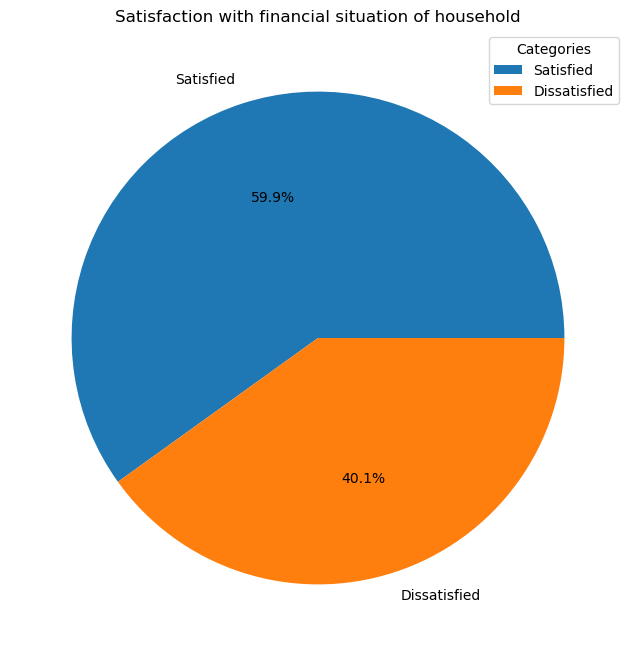

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q50: Satisfaction with financial situation of household'].value_counts(), labels = ['Satisfied' , 'Dissatisfied'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Satisfaction with financial situation of household')
plt.show()

###  Preparing the variable no. 3


In [17]:
imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'].value_counts()

Q54: Frequency you/family (last 12 month): Gone without a cash income
 4    644
 2    435
 3    279
 1    120
-2      4
Name: count, dtype: int64

In [18]:
# removing missing values
imp_columns = imp_columns[imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'] != -2]
imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'].value_counts()

Q54: Frequency you/family (last 12 month): Gone without a cash income
4    644
2    435
3    279
1    120
Name: count, dtype: int64

In [19]:
#Mapping
# 1- Often
# 2- Somtimes (combining Sometimes & Rarely)
# 3- Never

imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'] = imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'].map({
    1:1 , 2:2 ,3:2 , 4:3})

imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'].value_counts()

Q54: Frequency you/family (last 12 month): Gone without a cash income
2    714
3    644
1    120
Name: count, dtype: int64

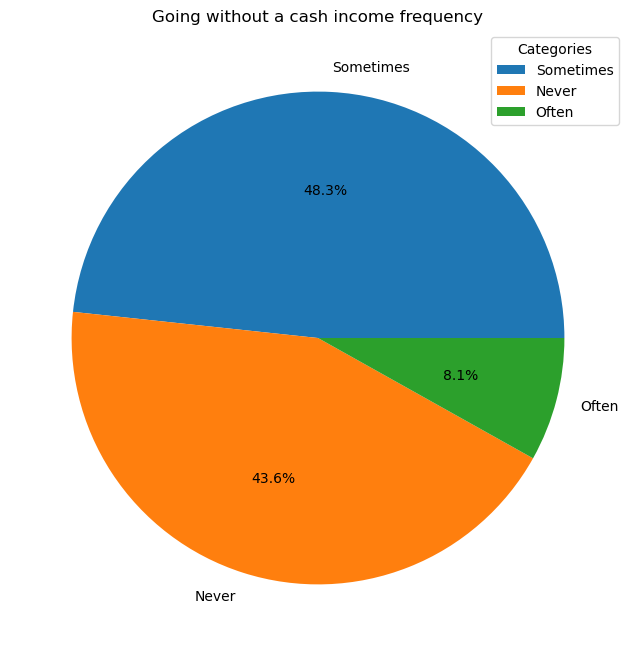

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q54: Frequency you/family (last 12 month): Gone without a cash income'].value_counts(), labels = ['Sometimes' , 'Never' , 'Often'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Going without a cash income frequency')
plt.show()

###  Preparing the variable no. 4


In [21]:
imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'].value_counts()

Q158: Science and technology are making our lives healthier, easier, and more comfortable
 10    248
 8     245
 5     224
 7     170
 9     119
 1     119
 6     100
 3      95
 4      77
 2      66
-5      15
Name: count, dtype: int64

In [22]:
# removing missing values
imp_columns = imp_columns[imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'] != -5]
imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'].value_counts()

Q158: Science and technology are making our lives healthier, easier, and more comfortable
10    248
8     245
5     224
7     170
9     119
1     119
6     100
3      95
4      77
2      66
Name: count, dtype: int64

In [23]:
# Mapping
# 1- Agree (Combining values from 6 to 10)
# 2- Disagree (Combining values from 1 to 5)


imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'] = imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'].map({
    1:2 , 2:2 ,3:2 , 4:2 ,5:2,6:1 , 7:1 , 8:1 , 9:1 , 10:1})

imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'].value_counts()

Q158: Science and technology are making our lives healthier, easier, and more comfortable
1    882
2    581
Name: count, dtype: int64

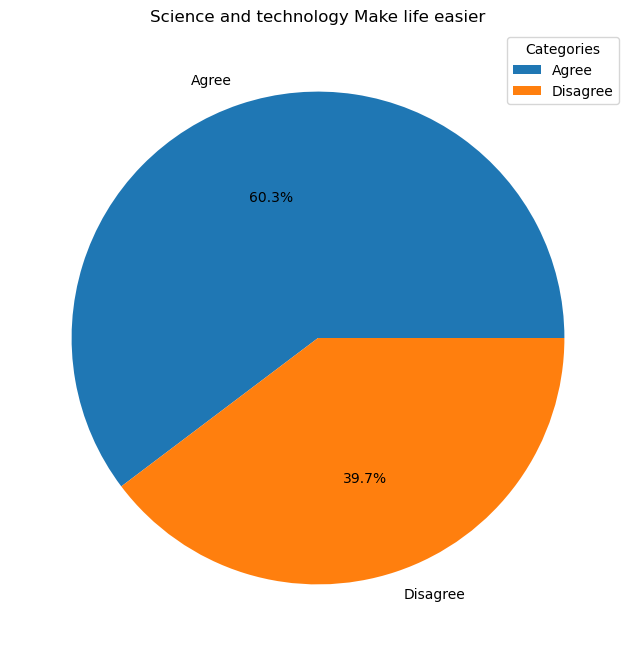

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q158: Science and technology are making our lives healthier, easier, and more comfortable'].value_counts(), labels = ['Agree' , 'Disagree'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Science and technology Make life easier')
plt.show()

###  Preparing the variable no. 5


In [25]:
imp_columns['Q260: Sex'].value_counts()

Q260: Sex
 2    770
 1    684
-5      9
Name: count, dtype: int64

In [26]:
# removing missing values
imp_columns = imp_columns[imp_columns['Q260: Sex'] != -5]
imp_columns['Q260: Sex'].value_counts()

Q260: Sex
2    770
1    684
Name: count, dtype: int64

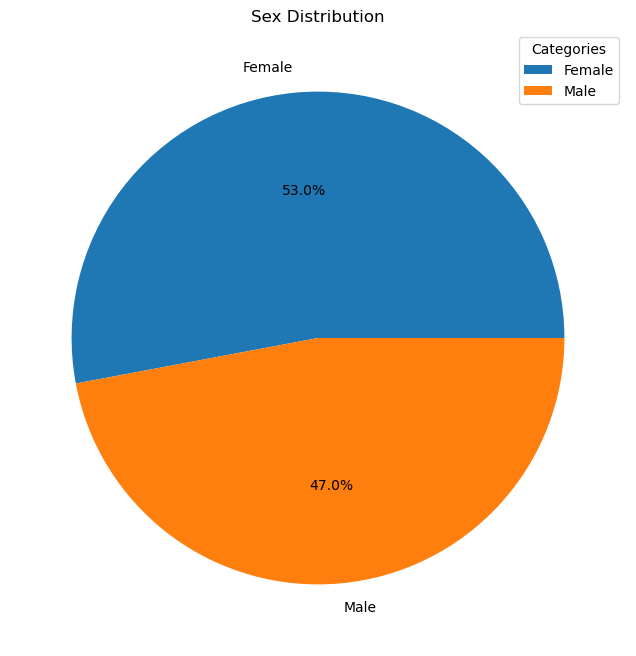

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(imp_columns['Q260: Sex'].value_counts(), labels = ['Female' , 'Male'],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Sex Distribution')
plt.show()

# Final form of data

In [28]:
recoded_data = imp_columns
recoded_data.shape

(1454, 6)

In [29]:
# View possible values for all columns
recoded_data.apply(pd.Series.value_counts)


,Q46: Feeling of happiness,Q48: How much freedom of choice and control,Q50: Satisfaction with financial situation of household,Q54: Frequency you/family (last 12 month): Gone without a cash income,"Q158: Science and technology are making our lives healthier, easier, and more comfortable",Q260: Sex
1,476,865.0,873.0,115,879.0,684.0
2,742,589.0,581.0,706,575.0,770.0
3,236,NaN,NaN,633,NaN,NaN


# Creating 2-way tables & testing independence

In [30]:
# To calculate Pearson chi-square test for independence
from scipy.stats import chi2_contingency


In [31]:
table1 = pd.crosstab(recoded_data['Q48: How much freedom of choice and control'],recoded_data['Q46: Feeling of happiness'])
chi2, p, dof, expected = chi2_contingency(table1)


print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.9f}")

Chi-square statistic: 25.62
P-value: 0.000002730


In [32]:
# Change table style
styled_table1 = table1.style.set_table_styles([{'selector': 'th',
                                               'props': [('background-color', 'lightgrey'),
                                                         ('color', 'black'),
                                                         ('font-weight', 'bold'),
                                                         ('border', '2px solid black')]},
                                              {'selector': 'td',
                                               'props': [('border', '2px solid black')]}])

styled_table1

Q46: Feeling of happiness,1,2,3
Q48: How much freedom of choice and control,,,
1,280,477,108
2,196,265,128


In [33]:
table2 = pd.crosstab(recoded_data['Q50: Satisfaction with financial situation of household'],recoded_data['Q46: Feeling of happiness'])
chi2, p, dof, expected = chi2_contingency(table2)


print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.9f}")

Chi-square statistic: 27.43
P-value: 0.000001106


In [34]:
# Change table style
styled_table2 = table2.style.set_table_styles([{'selector': 'th',
                                               'props': [('background-color', 'lightgrey'),
                                                         ('color', 'black'),
                                                         ('font-weight', 'bold'),
                                                         ('border', '2px solid black')]},
                                              {'selector': 'td',
                                               'props': [('border', '2px solid black')]}])

styled_table2

Q46: Feeling of happiness,1,2,3
Q50: Satisfaction with financial situation of household,,,
1,306,461,106
2,170,281,130


In [35]:
table3 = pd.crosstab(recoded_data['Q54: Frequency you/family (last 12 month): Gone without a cash income'],recoded_data['Q46: Feeling of happiness'])

chi2, p, dof, expected = chi2_contingency(table3) # Calculate pearson chi-sqaure test stat


print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.9f}")

Chi-square statistic: 83.40
P-value: 0.000000000


In [36]:
styled_table3 = table3.style.set_table_styles([{'selector': 'th',
                                               'props': [('background-color', 'lightgrey'),
                                                         ('color', 'black'),
                                                         ('font-weight', 'bold'),
                                                         ('border', '2px solid black')]},
                                              {'selector': 'td',
                                               'props': [('border', '2px solid black')]}])

styled_table3

Q46: Feeling of happiness,1,2,3
Q54: Frequency you/family (last 12 month): Gone without a cash income,,,
1,35,43,37
2,188,366,152
3,253,333,47


In [37]:
table4 = pd.crosstab(recoded_data['Q158: Science and technology are making our lives healthier, easier, and more comfortable'],recoded_data['Q46: Feeling of happiness'])

chi2, p, dof, expected = chi2_contingency(table4) # Calculate pearson chi-sqaure test stat


print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.9f}")

Chi-square statistic: 54.47
P-value: 0.000000000


In [38]:
styled_table4 = table4.style.set_table_styles([{'selector': 'th',
                                               'props': [('background-color', 'lightgrey'),
                                                         ('color', 'black'),
                                                         ('font-weight', 'bold'),
                                                         ('border', '2px solid black')]},
                                              {'selector': 'td',
                                               'props': [('border', '2px solid black')]}])

styled_table4

Q46: Feeling of happiness,1,2,3
"Q158: Science and technology are making our lives healthier, easier, and more comfortable",,,
1,258,514,107
2,218,228,129


In [39]:
table5 = pd.crosstab(recoded_data['Q260: Sex'],recoded_data['Q46: Feeling of happiness'])

chi2, p, dof, expected = chi2_contingency(table5) # Calculate pearson chi-sqaure test stat


print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 3.85
P-value: 0.1456


In [40]:
styled_table5 = table5.style.set_table_styles([{'selector': 'th',
                                               'props': [('background-color', 'lightgrey'),
                                                         ('color', 'black'),
                                                         ('font-weight', 'bold'),
                                                         ('border', '2px solid black')]},
                                              {'selector': 'td',
                                               'props': [('border', '2px solid black')]}])

styled_table5

Q46: Feeling of happiness,1,2,3
Q260: Sex,,,
1,211,350,123
2,265,392,113


# Creating 3-way Table

In [41]:
pd.crosstab(index=recoded_data['Q50: Satisfaction with financial situation of household'], columns=[recoded_data['Q46: Feeling of happiness'], recoded_data['Q48: How much freedom of choice and control']])


Q46: Feeling of happiness                             1         2        3    
Q48: How much freedom of choice and control           1    2    1    2   1   2
Q50: Satisfaction with financial situation of h...                            
1                                                   211   95  352  109  73  33
2                                                    69  101  125  156  35  95

In [42]:
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(index=recoded_data['Q50: Satisfaction with financial situation of household'], columns=[recoded_data['Q46: Feeling of happiness'], recoded_data['Q48: How much freedom of choice and control']]))

chi2_stat, p_val , dof

(180.60566370036784, 3.972720992548959e-37, 5)

# Preprocessing Data for Binary logistic Regression model

In [43]:
binary_data = imp_columns
binary_data

,Q46: Feeling of happiness,Q48: How much freedom of choice and control,Q50: Satisfaction with financial situation of household,Q54: Frequency you/family (last 12 month): Gone without a cash income,"Q158: Science and technology are making our lives healthier, easier, and more comfortable",Q260: Sex
0,2,1,1,3,2,2
1,1,1,1,3,2,1
2,2,2,2,2,1,1
3,1,1,1,2,1,2
4,2,1,2,1,2,2
...,...,...,...,...,...,...
1495,1,2,2,2,1,2
1496,1,2,2,1,1,1
1497,1,1,1,3,1,2
1498,2,1,1,3,1,1


In [44]:
binary_data['Q46: Feeling of happiness'].value_counts()

Q46: Feeling of happiness
2    742
1    476
3    236
Name: count, dtype: int64

In [45]:
# combine category 2 and 3 to be in a new one category(2)

# Mapping 2 & 3 to be 2(unhappy)
# 1- he's happy
# 2- he's unhappy

binary_data['Q46: Feeling of happiness'] = binary_data['Q46: Feeling of happiness'].map({1:1 , 2:2 , 3:2})

In [46]:
binary_data['Q46: Feeling of happiness'].value_counts()

Q46: Feeling of happiness
2    978
1    476
Name: count, dtype: int64

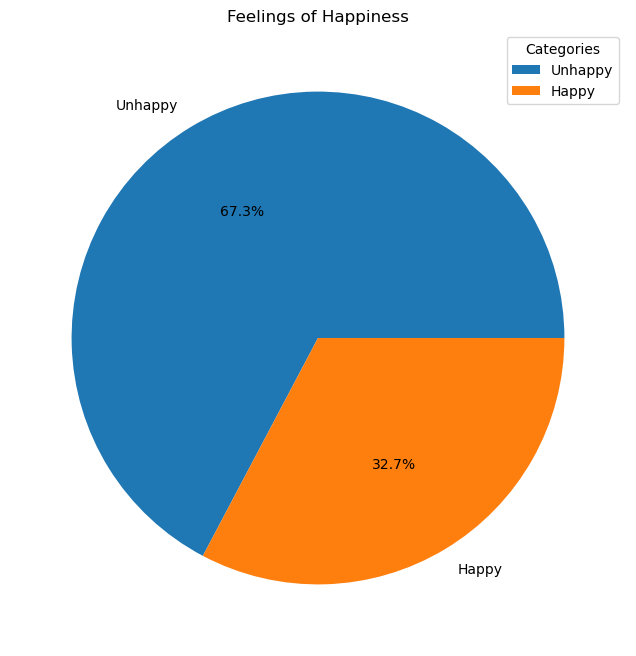

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(binary_data['Q46: Feeling of happiness'].value_counts(), labels = [ 'Unhappy' , 'Happy' ],
       autopct='%1.1f%%')
ax.legend(title='Categories', loc='best')
ax.set_title('Feelings of Happiness')
plt.show()

In [48]:
binary_data.to_csv('binary.csv' , index = True)
